<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Suppot_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*서울대학교 데이터사이언스 대학원 이준석 교수님 수업 정리*

# Lecture 10. Support Vector Machines

요약: decision boundary 근처에 있는 x값들 즉, support vector들이 decision boundary에 이르는 거리가 넓게 하는 (margin이 넓어지는) decision boundary를 구하는 방식

## **1. Support Vector Machines for Linearly Seperable Cases**

- Margin-based classifier

>> if y = {+1,-1} 가정

>> beta와 x의 각도가 90도 이내면 beta*x>0 -> y_hat=+1

>> beta와 x의 각도가 90도보다 크면 beta*x<0 -> y_hat=-1

<br/>

- Maximal Margin Classifier

>> Margin: decision boundary와 data point의 가장 짧은 거리 또는 , 두 class 사이의 거리로도 이해할 수 있음 (이 거리가 커야 분류가 잘 된 것)

>> (아래와 같은 수식으로 표현할 수 있음 )

>> 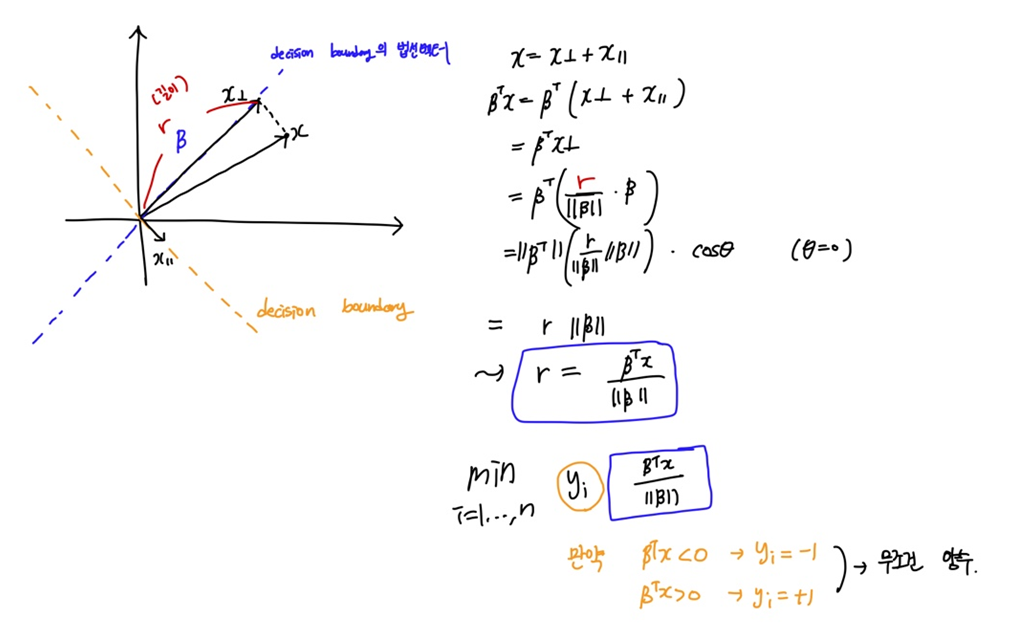

>> Maximal Margin Classifier: 위에서 정의한 Margin을 최대로 하는 beta 찾기

>> 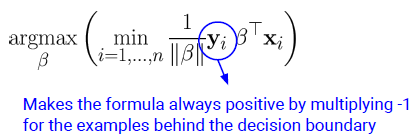

>> 하지면, 위를 그냥 MLE로 풀기에는 너무 계산량이 많음 (**Primal problem**) -> 약간의 trick 필요

>>> 아래와 같이, 어떤 양수를 곱해도 부호가 유지되는 성질을 이용해서, scale을 조정

>>> 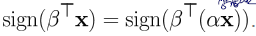

>>> 아래와 같이 Lagrange Multiplier를 이용한 수식 변형이 가능함 -> **Dual Problem**이  

>>> 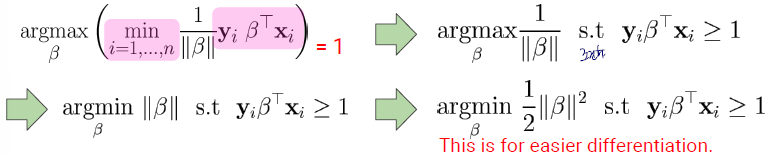

>>beta를 구하기 위해, **Largrange Multiplier**을 이용하여 다음과 같이 변형

>>> 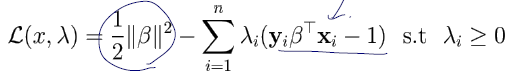

>>> **Lagrange Multiplier**란, 구하고 싶은 최대값이나 최소값을 g(x)=0, lambda >=0이라는 조건에서 각 편미분한 값이 0이 되게 하면 구할 수 있다는 공식

>>> 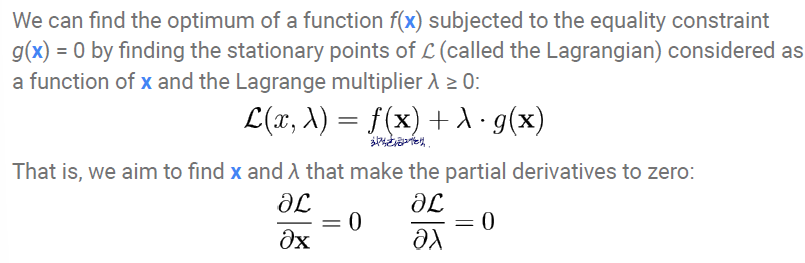



>> **Dual Problem**: Primal problem에 Lagrange multiplier를 적용하여 beta를 찾는 방식

>> 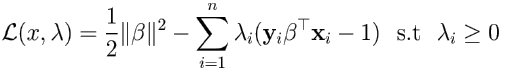


>>> beta와 lambda에 대해 각각 편미분하면, 각각 아래와 같은 추정값 가져올 수 있음


>>> 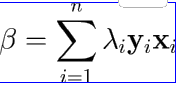

>>> 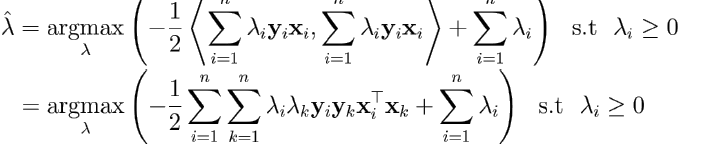

>>> - 주어진 값을 최대화하기 위해서는, 맞으면 lambda를 0으로, 틀린 곳에서는 큰 양수를 넣어야 값이 최대값이 됨.


>>> - lambda는 x들이 분류되기 어려운 정도를 가리

>>> - 0이 아닌 lambda를 갖는 margin의 x값들이 support vector라고 불림 (경계선에 멀리 있는 x들은 어차피 lambda=0이기에 고려할 요소들이 아님 -> support vector가 아님)


>> 최종 classifier는 다음과 같음

>> 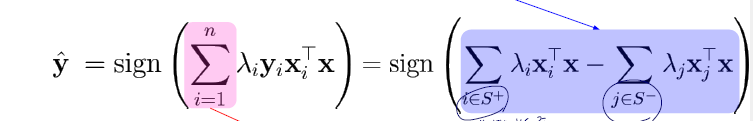

>> - x를 분류하기 위해, postive class (S+)에 있는 support vector들과 negative class (S-)에 있는 support vector들이 서로 경쟁함

## **2. Support Vector Machines for Linearly Non-separable Cases**

**1) 배경**: 아래와 같이 선형적으로 분류가 잘 안되는 상태의 데이터가 있을 수 있음

> 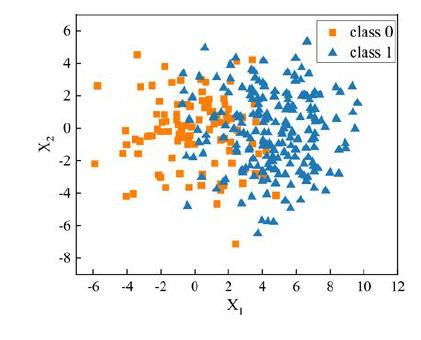

**2) 해결: Slack Variable**을 사용하면 이를 해결할 수 있음

> Slack variable: 각 데이터 포인트가 constraint를 위배하는 정도를 나타내는 변수


>- constraints

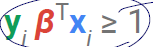


>- 부호 결정

>> 0 < ξi < 1 ->  decision boundary 안에 있다

>> ξi ≥ 1 ->  decision boundary 밖에 있다


>> 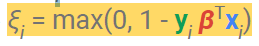

>> (예시)

>> 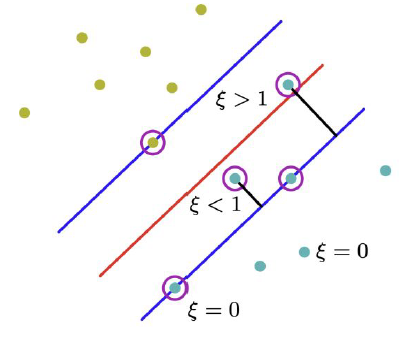

**3) Primal Problem with Slack Variables**

원래 primal problem에 hyperparameter인 C를 넣어서 표현하면 다음과 같음

> 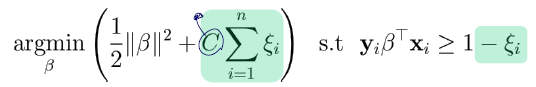

> 이를 해결하기 위해 Lagrange multiplier를 써서 Dual problem으로 변형하면 아래와 같은 식으로 결정 가능


>> 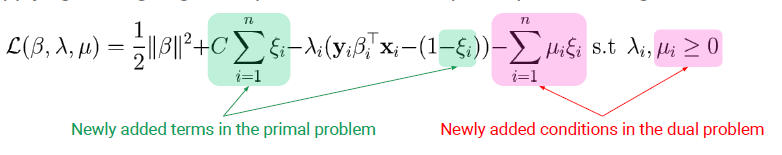


> 그를 이용하여 추정한 beta와 lambda는 다음과 같음

>> 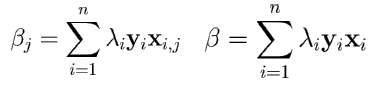

>> 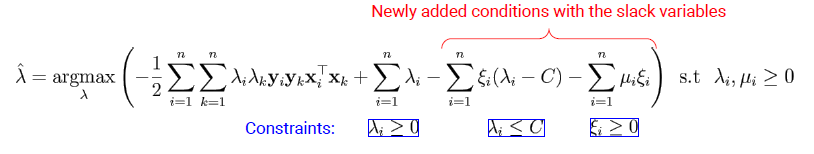

**4) Hyperparameter C의 역할**

- **C가 작아지면**, margin이 넓어지고, 이에 대해 missclassification rate이 조금 커질 수 있음

- **C가 커지면**, margin이 좁아지고, 이에 대해 missclassification rate이 더 작아질 수 있음

> 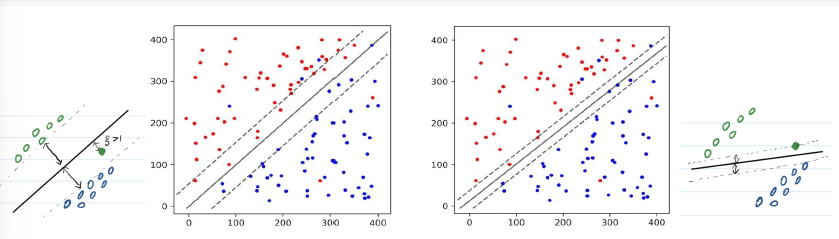

## **3. Margin-based Loss**

**1) 정의** : **정답 x 추정치**에 의해 기반한 loss로, classification이 옳으면 (같은 부호를 가지면) loss는 작아지거나 0에 수렴하고, 틀리면 (다른 부호를 가지면) loss는 커진다.

**2) 종류**

- 0/1 Loss: 맞으면 0, 틀리면 1로 Loss를 부여

> 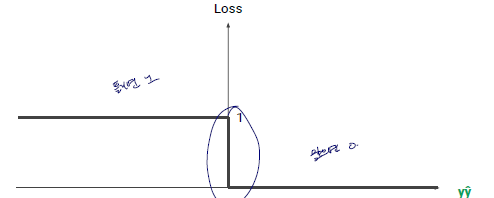

- **Log Loss**: logistic regression에서 활용했떤 loss로, 정확할수록 더 작은 penalty를 준다.

> 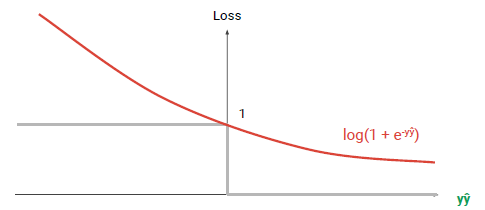

- **Exponential Loss**: Adaboost에서 활용한 loss

> 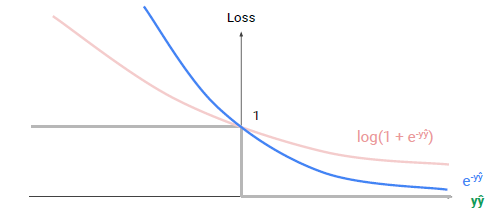

- **Hinge Loss**: L2 regularization과 함께 support vector machine에서 쓰이는 loss

> 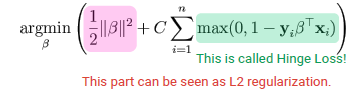

>> 맞춘 부분의 초반에는 약간의 loss를 주지만, 아예 맞춘 곳에는 loss를 0으로

>> 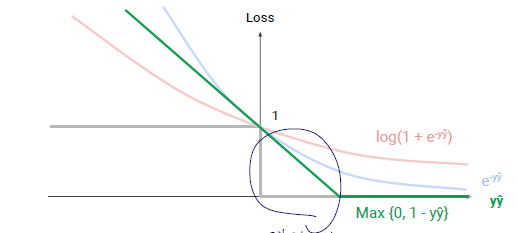

**3) 비교**: outlier나 noisy data가 있을 때는 exponential loss가 너무 불안정 -> **Hinge loss나 log loss**가 많이 쓰임

- Hinge Loss : 계산적으로 용이

- Log loss : 해석력이 있음.

## **4. Nonlinear SVMs and Kernals**

**1) 배경**: *선형적으로 분리가 불가능한 데이터*가 있을 때 **kernal**을 이용하여 **고차원으로** 해결

> 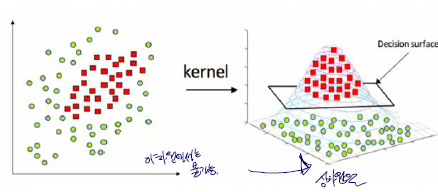


## **5. Support vector machin의 특징**

- 2개 이상의 class에 대해서: **한번에 분류하는 방법은 존재하지 않는다~~~** 아래 두가지 방법 고려할만 함

> 1) One vs. All: 하나 vs 그거 제외 다 인 것을 계속 수행한다

> 2) One vs, One: 하나 vs 하나를 모든 class에 대해 수핸한다

-> 별로 좋진않음


<br/>

**- Logistic Regression과의 비교**

> 1) **class들이 잘 분리**되어 있으면, SVM이 logistic regression (경계선 근처의 값들에 대해 불안정)보다 나음

>2) **Overlapping region이 많은** 경우, logistic regression이 더 선호되지만 성능은 비슷할 수 있음

>3) **probability를 구하고** 싶은 경우, logistic regression을 하기


>4) **Nonlinear boundary**에 대해 kernal SVM을 쓰는 것이 좋음
